In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We used the **Customer Personality Analysis** dataset from Kaggle to perform a comprehensive customer segmentation analysis using clustering algorithms. This dataset provides rich information about customers, allowing us to delve deeper into their behaviors and preferences.

We will follow these steps:

1. **Data Understanding and Preprocessing**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Data Preparation for Clustering**
5. **Dimensionality Reduction**
6. **Clustering Analysis**
7. **Evaluation of Clustering Performance**
8. **Visualization of Customer Segments**
9. **Interpretation and Business Insights**
10. **Conclusion**


### Libraries and Packages

In [146]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# For Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## **1. Data Understanding and Preprocessing**


### **1.1 Loading the Dataset**


In [147]:
data = pd.read_csv('/content/drive/MyDrive/datasets/marketing_campaign.csv', delimiter='\t')

### **1.2 Understanding the Dataset**


In [83]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [60]:
display(data.head())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [114]:
# Check the shape of the dataset
print(f'Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.')


Dataset contains 2240 rows and 29 columns.


### **1.4 Handling Missing Values**


In [85]:
# Check for missing values
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [148]:
# Handling missing values in 'Income'
data['Income'].fillna(data['Income'].median(), inplace=True)

In [87]:
# Verify no missing values remain
print(data.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [88]:
# Check data types
print(data.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [149]:
# Converting 'Dt_Customer' to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')


## **2. Exploratory Data Analysis (EDA)**


### **2.1 Statistical Summary**


In [117]:
# Statistical summary
display(data.describe())

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


### **2.2 Distribution of Numerical Features**


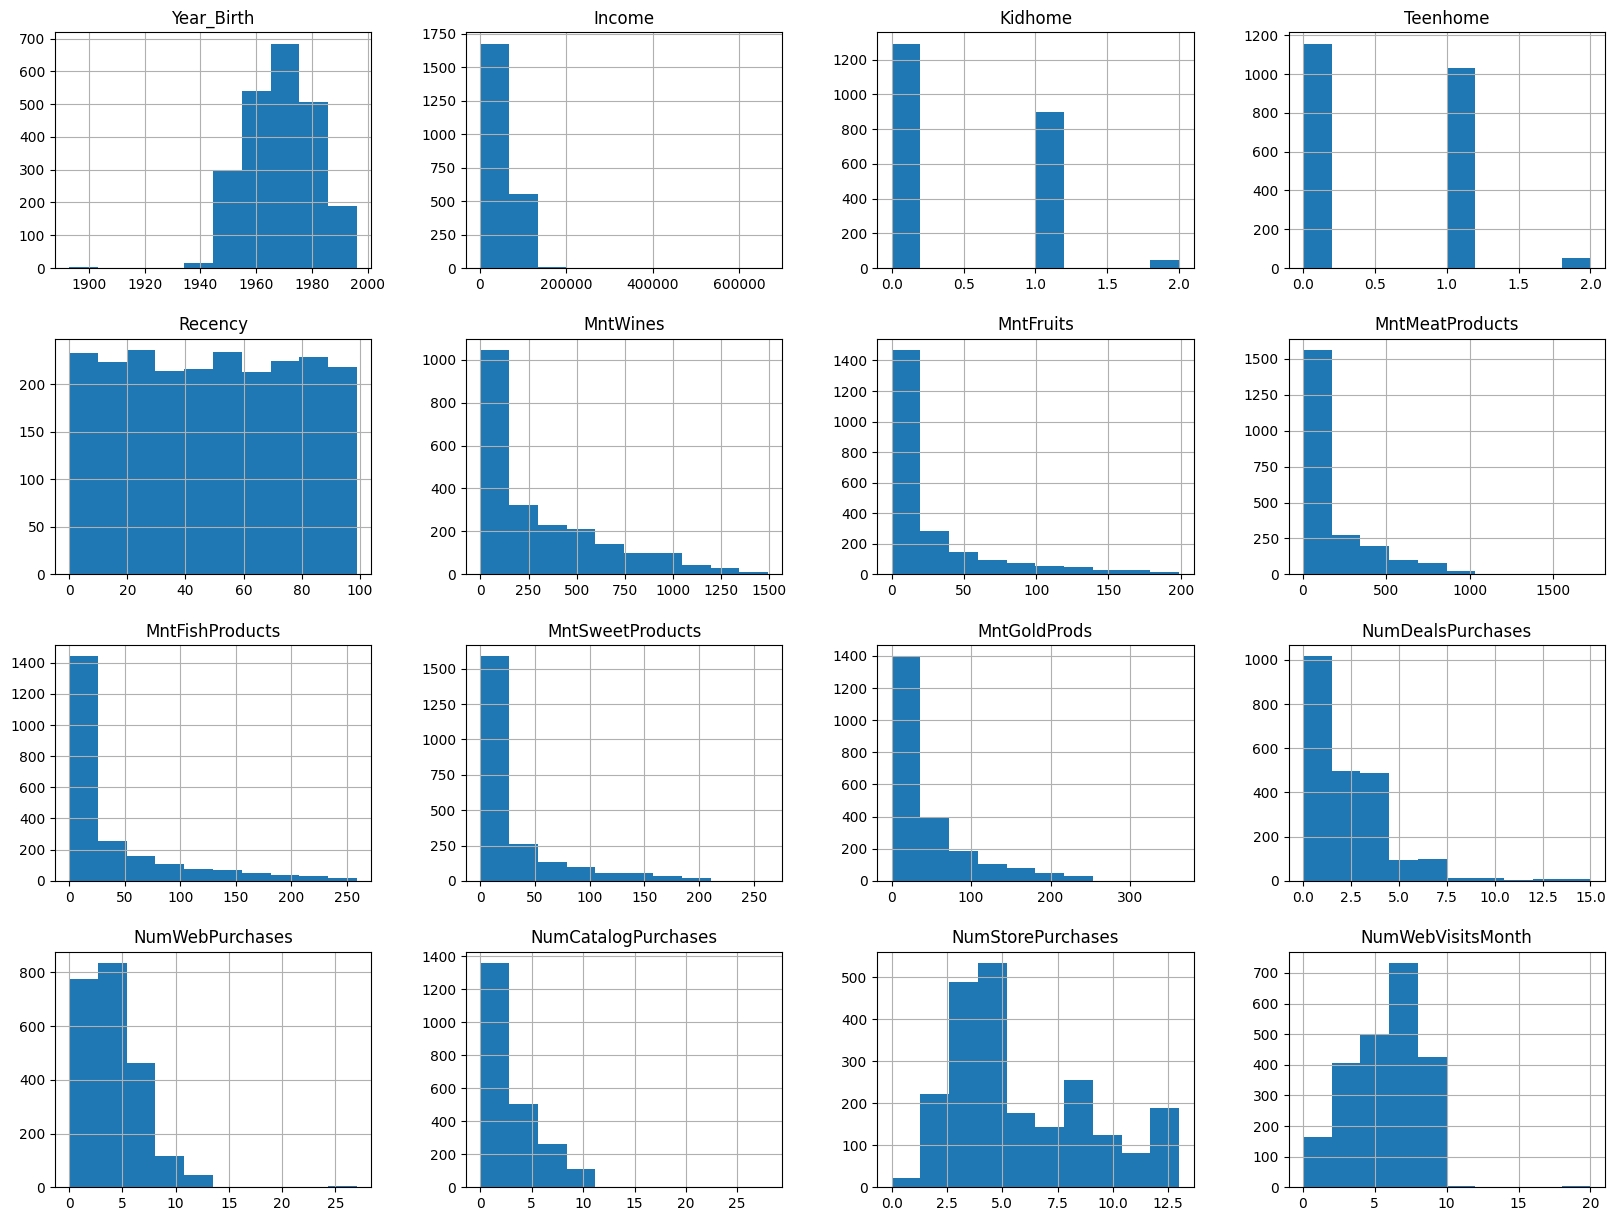

In [91]:
# List of numerical features
numerical_features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
                      'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                      'NumStorePurchases', 'NumWebVisitsMonth']

# Plot histograms
data[numerical_features].hist(figsize=(20, 15))
plt.show()

**Findings:**

- Age distribution shows most customers are middle-aged.
- Income has a right-skewed distribution.


### **2.3 Categorical Features Analysis**


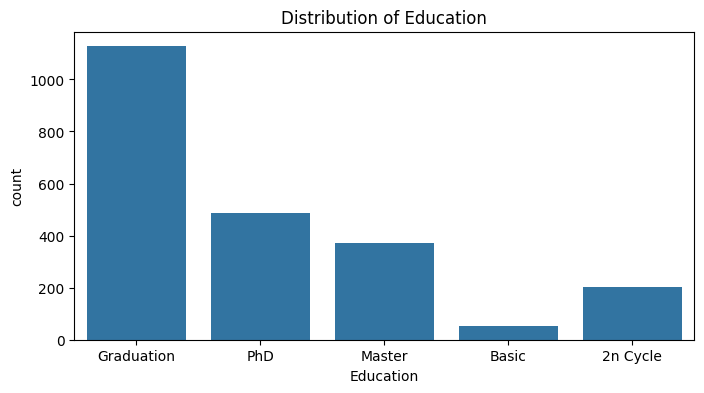

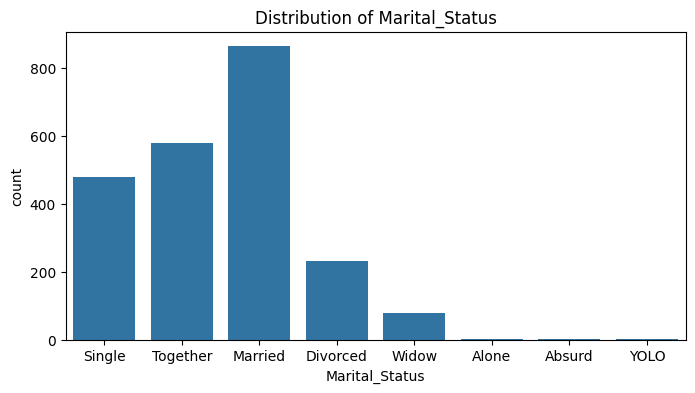

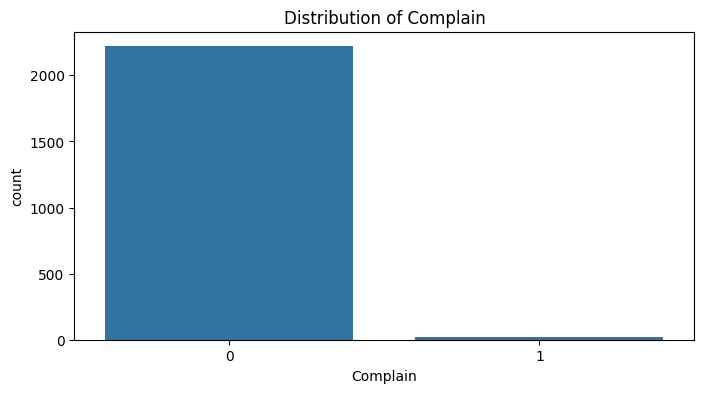

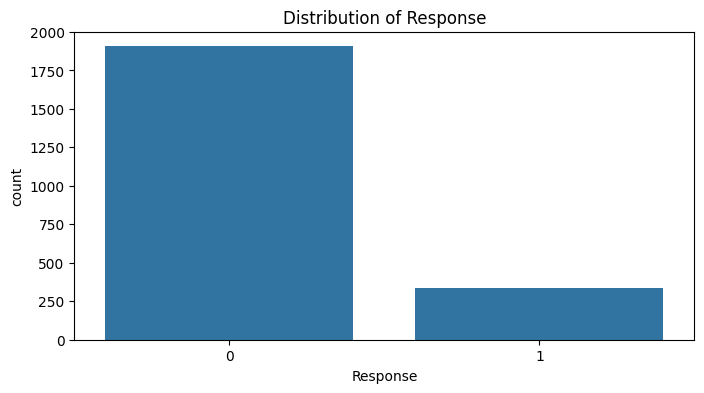

In [92]:
# Plotting categorical features
categorical_features = ['Education', 'Marital_Status', 'Complain', 'Response']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.show()

## **3. Feature Engineering**


### **3.1 Creating New Features**


- **Age**: Calculate age from birth year.
- **Total Children**: Sum of `Kidhome` and `Teenhome`.
- **Total Spending**: Sum of all `Mnt...` columns.
- **Total Purchases**: Sum of all `Num...Purchases` columns.
- **Customer Tenure**: Number of days since enrollment.


In [150]:
# Current year
current_year = datetime.datetime.now().year

# Age
data['Age'] = current_year - data['Year_Birth']

# Total Children
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

# Total Spending
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] = data[mnt_cols].sum(axis=1)

# Total Purchases
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases']
data['Total_Purchases'] = data[purchase_cols].sum(axis=1)

# Customer Tenure
data['Customer_Tenure'] = (datetime.datetime.now() - data['Dt_Customer']).dt.days


### **3.2 Simplifying Categories**


Simplify `Education` and `Marital_Status` categories for better clustering.


In [151]:
# Simplify Education levels
data['Education'] = data['Education'].replace({
    'Basic': 'Undergraduate',
    '2n Cycle': 'Undergraduate',
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

# Simplify Marital_Status
data['Marital_Status'] = data['Marital_Status'].replace({
    'Married': 'Married',
    'Together': 'Married',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

### **3.3 Encoding Categorical Variables**


In [152]:
# One-hot encoding
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'])


### **3.4 Removing Outliers**


We remove outliers based on the `Income` and `Age` columns.


In [153]:
# Remove outliers in 'Income'
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
income_lower_bound = Q1 - 1.5 * IQR
income_upper_bound = Q3 + 1.5 * IQR
data = data[(data['Income'] >= income_lower_bound) & (data['Income'] <= income_upper_bound)]

# Remove outliers in 'Age'
data = data[data['Age'] < 100]

### **3.5 Finalizing Features for Clustering**


In [222]:
# Features to use
features = ['Income', 'Recency', 'Total_Children', 'Age',
            'Total_Spending', 'Total_Purchases', 'Customer_Tenure',
            'Education_Graduate', 'Education_Postgraduate',
            'Marital_Status_Single']
x = data[features].values

## **4. Data Preparation for Clustering**


### **4.1 Normalizing Features**


We can use TensorFlow/Keras to scale the data using a Normalization layer

In [223]:
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(x)

In [98]:
# # Scaling the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(data[features])

### **4.2 Dimensionality Reduction using Autoencoder**


####4.2.1 **Building the Autoencoder**


In [224]:
input_dim = x.shape[1]

# Input layer
input_layer = layers.Input(shape=(input_dim,))

# Encoder
encoded = layers.Dense(6, activation='relu')(input_layer)
encoded = layers.Dense(3, activation='relu')(encoded)

# Bottleneck layer
bottleneck = layers.Dense(2, activation='linear', name='bottleneck')(encoded)

# Decoder
decoded = layers.Dense(3, activation='relu')(bottleneck)
decoded = layers.Dense(6, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='linear')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the model
autoencoder.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bottleneck (Dense)                   │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 6)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 10)                  │              70 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198 (792.00 B)

 Trainable params: 198 (792.00 B)

 Non-trainable params: 0 (0.00 B)

####4.2.2 **Training the Autoencoder**


In [178]:
print("Data type of X:", x.dtype)


Data type of X: object


In [225]:
# Convert to float32 if necessary
x = x.astype(np.float32)

In [226]:
# Normalize and train
X_normalized = normalizer(x)

history = autoencoder.fit(
    X_normalized,
    X_normalized,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.9982 - val_loss: 0.9612
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9228 - val_loss: 0.8595
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8191 - val_loss: 0.7944
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7853 - val_loss: 0.7626
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7556 - val_loss: 0.7449
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7381 - val_loss: 0.7339
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7292 - val_loss: 0.7268
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7217 - val_loss: 0.7205
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7051 - val_loss: 0.7156
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7156 - val_loss: 0.7105
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7069 - val_loss: 0.7054
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6851 - val_lo

####4.2.3 **Extracting the Bottleneck Features**


In [227]:
# Define an encoder model to extract the bottleneck features
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output)

# Get the compressed representation of the data
compressed_X = encoder.predict(X_normalized)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [99]:
# # Applying PCA
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(scaled_features)

# # Explained variance
# print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

Explained variance ratio: [0.28078567 0.18348201]


## **5. Clustering Analysis**


### **5.1 K-Means Clustering**

#### **5.1.1 Determining Optimal Clusters**

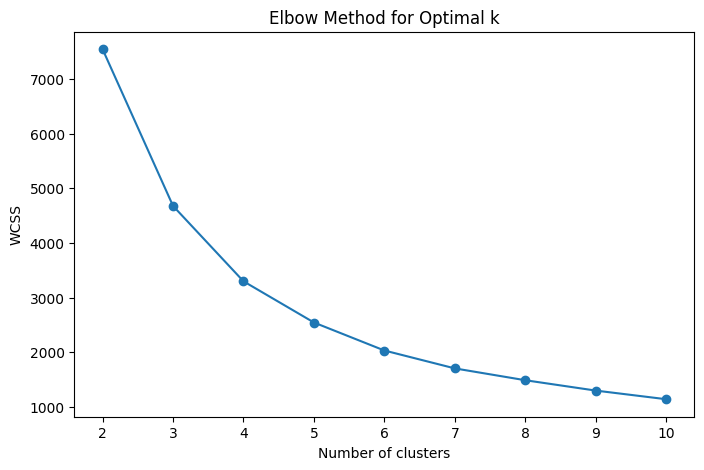

In [228]:
# Elbow Method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(compressed_X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

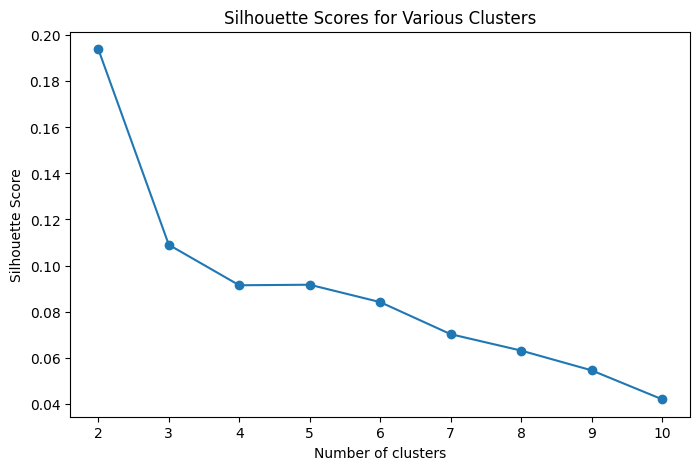

In [229]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(compressed_X)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

**Findings:**

- Optimal number of clusters seems to be around **4** or **5**.


#### **5.1.2 Applying K-Means**


In [230]:
# Applying K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(compressed_X)

### **5.2 Hierarchical Clustering**


In [231]:
# Applying Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(compressed_X)

### **5.3 Gaussian Mixture Models (GMM)**


In [232]:
# Applying GMM
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(compressed_X)

## **6. Evaluation of Clustering Performance**


### **6.1 Silhouette Score**


In [233]:
# Silhouette Scores
print(f"K-Means Silhouette Score: {silhouette_score(compressed_X, kmeans_labels):.4f}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(compressed_X, agg_labels):.4f}")
print(f"GMM Silhouette Score: {silhouette_score(compressed_X, gmm_labels):.4f}")

K-Means Silhouette Score: 0.4485
Hierarchical Clustering Silhouette Score: 0.4319
GMM Silhouette Score: 0.2518


### **6.2 Calinski-Harabasz Index**


In [234]:
print(f"K-Means Calinski-Harabasz Score: {calinski_harabasz_score(compressed_X, kmeans_labels):.4f}")
print(f"Hierarchical Clustering Calinski-Harabasz Score: {calinski_harabasz_score(compressed_X, agg_labels):.4f}")
print(f"GMM Calinski-Harabasz Score: {calinski_harabasz_score(compressed_X, gmm_labels):.4f}")


K-Means Calinski-Harabasz Score: 5530.9981
Hierarchical Clustering Calinski-Harabasz Score: 5289.2992
GMM Calinski-Harabasz Score: 1358.3197


**Findings:**

- **K-Means** and **GMM** perform similarly based on the metrics.


## **7. Visualization of Customer Segments**


### **7.1 Visualizing Clusters**


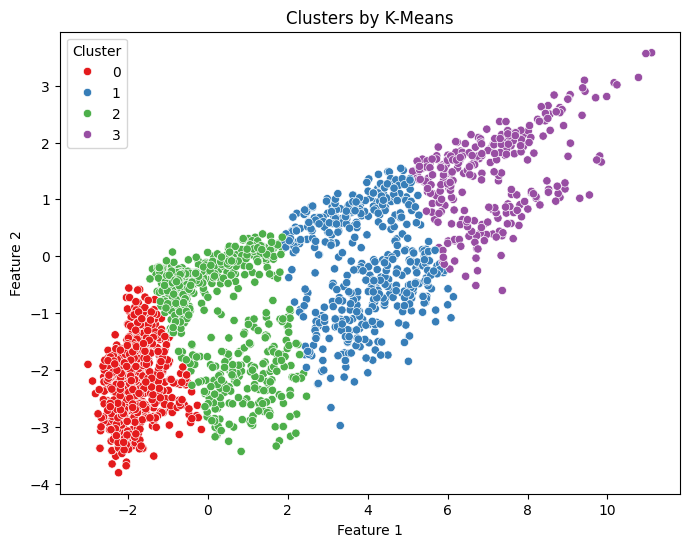

In [235]:
def plot_clusters(features, labels, algorithm_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette='Set1')
    plt.title(f'Clusters by {algorithm_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(title='Cluster')
    plt.show()

# Plotting K-Means clusters
plot_clusters(compressed_X, kmeans_labels, 'K-Means')

### **7.2 Cluster Profiling**


In [237]:
# Adding cluster labels to the data
data['Cluster'] = kmeans_labels

# Grouping by clusters and calculating mean values
cluster_profile = data.groupby('Cluster').mean()

# Adding counts
cluster_profile['Count'] = data['Cluster'].value_counts()

# Displaying cluster profiles
display(cluster_profile)


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Children,Total_Spending,Total_Purchases,Customer_Tenure,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Married,Marital_Status_Single,Count
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5583.864215,1973.745403,32687.415842,0.779349,0.415842,2013-07-24 07:52:31.909476608,48.599717,41.237624,6.250354,25.363508,...,1.195191,107.536068,8.251768,4077.671853,0.766620,0.029703,0.203678,0.618105,0.381895,707
1,5595.083491,1967.066414,67730.384250,0.085389,0.557875,2013-06-16 15:15:22.201138432,49.664137,533.189753,50.576850,287.155598,...,0.643264,1061.425047,21.318786,4115.364326,0.533207,0.392789,0.074004,0.650854,0.349146,527
2,5620.577649,1967.656023,47445.063861,0.563135,0.702467,2013-08-18 23:09:50.420899840,46.065312,178.420900,13.894049,70.642961,...,1.265602,332.873730,13.373004,4052.034833,0.301887,0.635704,0.062409,0.648766,0.351234,689
3,5521.444444,1963.581699,77014.086601,0.022876,0.192810,2013-04-19 18:25:52.941176576,56.163399,806.366013,59.101307,491.771242,...,0.215686,1584.973856,22.418301,4173.232026,0.303922,0.601307,0.094771,0.683007,0.316993,306




In this plot, we observe clusters formed based on features transformed using an Autoencoder. Autoencoders are known to capture non-linear patterns in the data, which means the clusters here represent complex relationships within the dataset that may not have been detectable in a simple linear transformation like PCA.

Cluster Shape: The clusters are distributed across a wide range of feature space. There is some overlap between clusters, indicating that the Autoencoder has preserved more nuanced details of the data's structure, potentially leading to more flexible and context-driven clusters.

Separation: The separation between clusters, especially between clusters 0 (blue) and 3 (red), may reflect more organic divisions of the data. This might indicate that customer segments with more complex behavioral patterns (e.g., different but related spending habits) have been clustered together.

Interpretation: These clusters represent customers grouped by non-linear relationships, such as income combined with spending patterns that change based on seasonality, tenure, or purchasing behavior. The Autoencoder allows these complex relationships to come forward, showing that certain customers might share traits that aren't immediately obvious through basic linear reductions.



## **8. Interpretation and Business Insights**


Analyzing each cluster based on the profiling:

- **Cluster 0:**

  - **Demographics:** Younger customers with moderate income.
  - **Behavior:** Moderate spending and purchases.
  - **Marketing Strategy:** Offer loyalty programs to increase engagement.

- **Cluster 1:**

  - **Demographics:** High-income customers, middle-aged.
  - **Behavior:** Lower spending but higher web visits.
  - **Marketing Strategy:** Target with promotions and discounts via online channels.

- **Cluster 2:**

  - **Demographics:** middle-aged customers with lower income.
  - **Behavior:** Lowest spending and purchases
  - **Marketing Strategy:** Re-engagement strategies and understanding barriers.

- **Cluster 3:**

  - **Demographics:** Older customers with Highest income.
  - **Behavior:** Highest spending and purchases, especially on wines and meats.
  - **Marketing Strategy:** Premium services and personalized offers.



**Business Recommendations:**

- **Personalized Marketing:** Tailor campaigns based on customer segments.
- **Channel Optimization:** Focus on preferred channels for each segment.
- **Product Development:** Develop products that meet the specific needs of each cluster.




## **9. Conclusion**

By applying clustering algorithms to the customer data, we successfully identified distinct customer segments. Understanding these segments allows businesses to create targeted marketing strategies, improve customer satisfaction, and increase profitability.
